<a href="https://colab.research.google.com/github/open-mmlab/mmsegmentation/blob/master/demo/MMSegmentation_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_May__3_19:15:13_PDT_2021
Cuda compilation tools, release 11.3, V11.3.109
Build cuda_11.3.r11.3/compiler.29920130_0
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



# Import Libraries

In [2]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.10.0 True
0.21.1


# Visualize the dataset

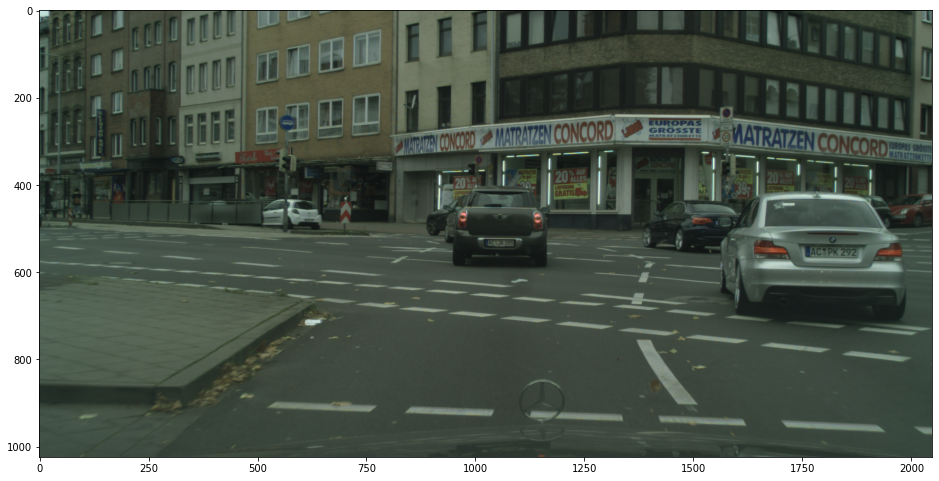

In [3]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('Cityscapes/images/train/aachen_000003_000019_leftImg8bit.png')
plt.figure(figsize=(16, 14))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

In [4]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'Cityscapes'
img_dir = 'images/train'
ann_dir = 'labels/train'
# define class and plaette for better visualization
classes = ('background', 'road', 'sidewalk', 'building','wall', 'fence', 'pole', 'traffic light', 'traffic sign',
          'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus','train','motorcycle','bicycle')
palette = [[0,0,0], [128, 64, 128], [244,35,232], [70,70,70], [102,102,156], [190,153,153], [153, 153, 153],
           [250, 170,30], [220, 220, 0], [107, 142, 35], [152,251,152], [70,130,180],[220,20,60],[255,0,0],
           [0,0,142], [0,0,70], [0,60,100], [0,80,100],[0,0,230],[119,11,32]]
print(len(classes))
print(len(palette))

'''
for file in mmcv.scandir(osp.join(data_root, ann_dir),suffix='labelIds.png'):
  seg_img = Image.open(osp.join(data_root, ann_dir, file)).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file))
'''

20
20


"\nfor file in mmcv.scandir(osp.join(data_root, ann_dir),suffix='labelIds.png'):\n  seg_img = Image.open(osp.join(data_root, ann_dir, file)).convert('P')\n  seg_img.putpalette(np.array(palette, dtype=np.uint8))\n  seg_img.save(osp.join(data_root, ann_dir, file))\n"

In [5]:
# convert dataset annotation to semantic segmentation map
data_root = 'Cityscapes'
img_dir = 'images/val'
ann_dir = 'labels/val'
# define class and plaette for better visualization
classes = ('background', 'road', 'sidewalk', 'building','wall', 'fence', 'pole', 'traffic light', 'traffic sign',
          'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus','train','motorcycle','bicycle')
palette = [[0,0,0], [128, 64, 128], [244,35,232], [70,70,70], [102,102,156], [190,153,153], [153, 153, 153],
           [250, 170,30], [220, 220, 0], [107, 142, 35], [152,251,152], [70,130,180],[220,20,60],[255,0,0],
           [0,0,142], [0,0,70], [0,60,100], [0,80,100],[0,0,230],[119,11,32]]
print(len(classes))
print(len(palette))

'''
for file in mmcv.scandir(osp.join(data_root, ann_dir),suffix='labelIds.png'):
  seg_img = Image.open(osp.join(data_root, ann_dir, file)).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file))
'''

20
20


"\nfor file in mmcv.scandir(osp.join(data_root, ann_dir),suffix='labelIds.png'):\n  seg_img = Image.open(osp.join(data_root, ann_dir, file)).convert('P')\n  seg_img.putpalette(np.array(palette, dtype=np.uint8))\n  seg_img.save(osp.join(data_root, ann_dir, file))\n"

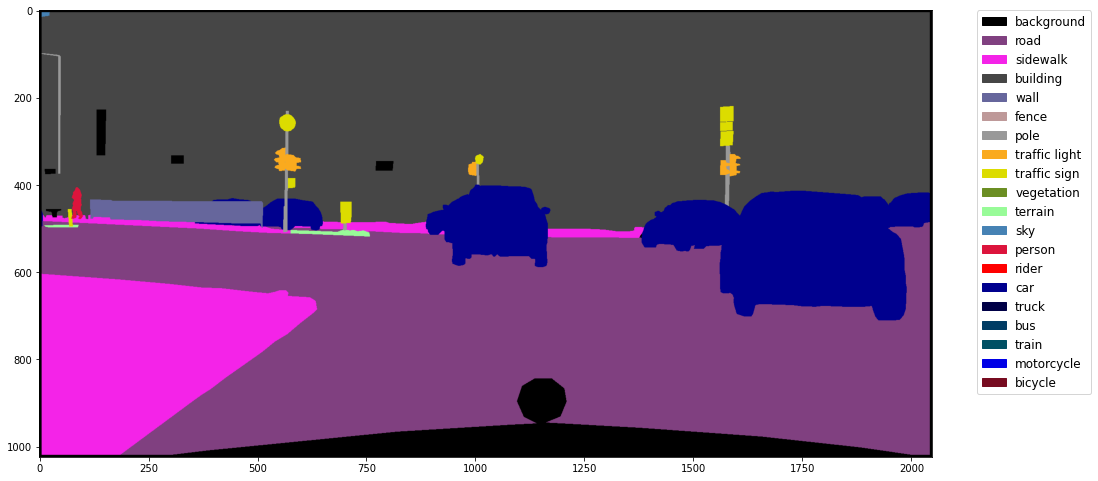

In [6]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('Cityscapes/labels/train/aachen_000003_000019_gtFine_labelIds.png')
plt.figure(figsize=(16, 14))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(20)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

# Register the custom dataset

In [7]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class CityscapeDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, **kwargs):
    super().__init__(img_suffix='leftImg8bit.png', seg_map_suffix='gtFine_labelIds.png', 
                     **kwargs)
    assert osp.exists(self.img_dir)

    

# Create a config file

In [2]:
from mmcv import Config
cfg = Config.fromfile('configs/segmenter/segmenter_vit-s_mask_8x1_512x512_160k_ade20k.py')

In [20]:
from mmseg.apis import set_random_seed

#HYPERPARAMETERS TO TUNE : Learning rate, batch size, optimizer, dropout

#OTHER BACKBONES TO TRY: ViT-Base, ViT-Large, Swin Transformer

#THINGS TO TRY: other data augmentations, k-fold cross validation, Tensorboard, Pretrain on Cityscapes

#MAIN PROBLEM: class imbalance -> validation data has few to no examples of some classes -> val. accuracy ~ 0

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='LN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 20

# Modify dataset type and path
cfg.dataset_type = 'CityscapeDataset'
cfg.data_root = data_root

#Batch size
cfg.data.samples_per_gpu = 1
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[127.5, 127.5, 127.5], std=[127.5, 127.5, 127.5], to_rgb=True)
cfg.crop_size = (768, 1024)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(2048, 768), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(2048, 768),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = 'images/train'
cfg.data.train.ann_dir = 'labels/train'
cfg.data.train.pipeline = cfg.train_pipeline

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = 'images/val'
cfg.data.val.ann_dir = 'labels/val'
cfg.data.val.pipeline = cfg.test_pipeline

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = 'images/val'
cfg.data.test.ann_dir = 'labels/val'
cfg.data.test.pipeline = cfg.test_pipeline

cfg.load_from = 'checkpoints/vit_large_p16_384.pth'
#cfg.load_from = './saved_models/segmen/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './saved_models/large_segmenter'

cfg.runner.max_iters = 100
cfg.log_config.interval = 10
cfg.evaluation.interval = 25
cfg.checkpoint_config.interval = 50

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='pretrain/vit_large_p16_384.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(768, 768),
        patch_size=16,
        in_channels=3,
        embed_dims=1024,
        num_layers=24,
        num_heads=16,
        drop_path_rate=0.1,
        attn_drop_rate=0.0,
        drop_rate=0.0,
        final_norm=True,
        norm_cfg=dict(type='LN', requires_grad=True),
        with_cls_token=True,
        interpolate_mode='bicubic'),
    decode_head=dict(
        type='SegmenterMaskTransformerHead',
        in_channels=1024,
        channels=1024,
        num_classes=20,
        num_layers=2,
        num_heads=16,
        embed_dims=1024,
        dropout_ratio=0.0,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0),
        norm_cfg=dict(type='LN', requires_grad=True)),
    test_cfg=dict(mode

# Train and Evaluation

In [21]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-03-02 20:17:03,048 - mmseg - INFO - Loaded 2975 images
2022-03-02 20:17:05,237 - mmseg - INFO - Loaded 500 images
2022-03-02 20:17:05,239 - mmseg - INFO - load checkpoint from local path: checkpoints/vit_large_p16_384.pth
2022-03-02 20:17:05,597 - mmseg - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: patch_embed.projection.weight, patch_embed.projection.bias, pos_embed, cls_token, ln1.weight, ln1.bias, layers.0.ln1.weight, layers.0.ln1.bias, layers.0.attn.attn.in_proj_weight, layers.0.attn.attn.in_proj_bias, layers.0.attn.attn.out_proj.weight, layers.0.attn.attn.out_proj.bias, layers.0.ln2.weight, layers.0.ln2.bias, layers.0.ffn.layers.0.0.weight, layers.0.ffn.layers.0.0.bias, layers.0.ffn.layers.1.weight, layers.0.ffn.layers.1.bias, layers.1.ln1.weight, layers.1.ln1.bias, layers.1.attn.attn.in_proj_weight, layers.1.attn.attn.in_proj_bias, layers.1.attn.attn.out_proj.weight, layers.1.attn.attn.out_proj.bias, layers.1.ln2.weigh

2022-03-02 20:17:05,627 - mmseg - INFO - Start running, host: rahul@rahul-Blade, work_dir: /home/rahul/Desktop/transformers-for-vision/mmsegmentation/transformers/saved_models/large_segmenter
2022-03-02 20:17:05,627 - mmseg - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_iter:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW       

RuntimeError: CUDA out of memory. Tried to allocate 578.00 MiB (GPU 0; 5.94 GiB total capacity; 4.49 GiB already allocated; 163.62 MiB free; 4.58 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

# Inference

/home/rahul/Desktop/transformers-for-vision/mmsegmentation/mmseg/models/segmentors/base.py:284: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

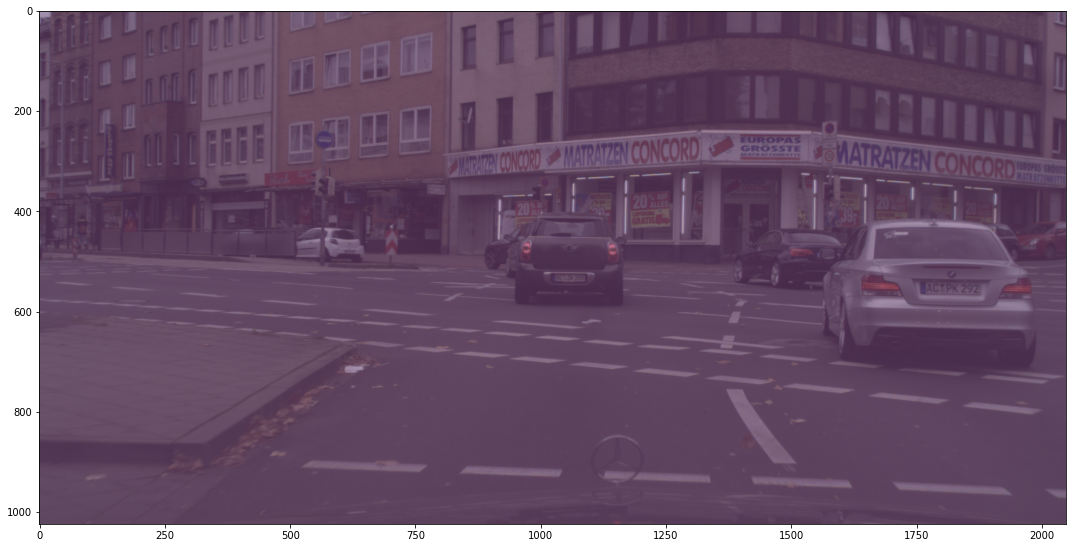

In [11]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

img = mmcv.imread('Cityscapes/images/train/aachen_000003_000019_leftImg8bit.png')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

# Load a saved model for inference

load checkpoint from local path: ./saved_models/small_segmenter3/latest.pth
The model and loaded state dict do not match exactly

size mismatch for backbone.pos_embed: copying a param with shape torch.Size([1, 1601, 384]) from checkpoint, the shape in current model is torch.Size([1, 2305, 384]).


<Figure size 576x432 with 0 Axes>

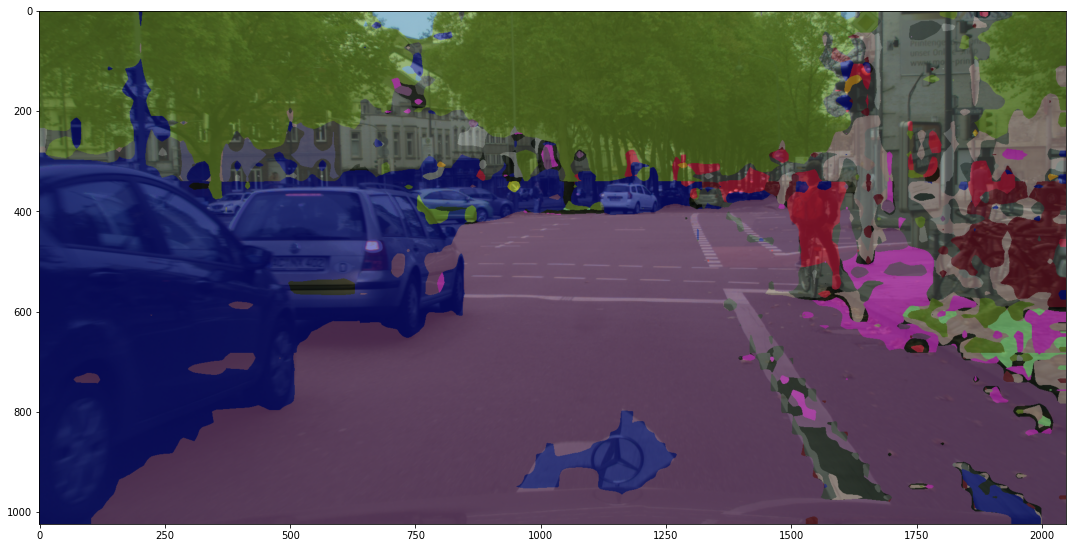

In [8]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import mmcv
import matplotlib.pyplot as plt

# Specify the path to model config and checkpoint file
checkpoint_file = './saved_models/small_segmenter3/latest.pth'

# build the model from a config file and a checkpoint file
model = init_segmentor(cfg, checkpoint_file, device='cuda:0')

img = mmcv.imread('Cityscapes/images/train/aachen_000010_000019_leftImg8bit.png')
model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

In [15]:
!jupyter nbconvert --to script segmenter_cityscapes_vitL.ipynb

[NbConvertApp] Converting notebook segmenter_cityscapes_vitL.ipynb to script
[NbConvertApp] Writing 9282 bytes to segmenter_cityscapes_vitL.py
